## About dataset:

It is taken from Kaggle. It contains signs and symptoms data of newly diabetic or would be diabetic patient. It is to be used for early stage diabetes risk prediction. 

Dataset: https://www.kaggle.com/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset

## Problem statement:
To predict whether the person will have diabetes or not (binary classification)

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
df = pd.read_csv("diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Explore data

In [3]:
df.shape

(520, 17)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
df.duplicated().sum()

269

In [8]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

#### Column description:
* Age: It represents age of patient. This data has patients in 20 to 65 age group.
* Sex: It represents sex of person - either Male or Female
* Polyuria, Polydipsia, sudden weight loss, weakness, Polyphagia, Genital thrush, visual blurring, Itching, Irritability, delayed healing, partial paresis, muscle stiffness, Alopecia, Obesity: These are all signs and symptoms observed in patients. There value is either yes or no. 
* Class: It is the ouput variable. It represents whether person tests positive or negative for the diabetes.

## Observation:

* There are 520 rows and 17 columns.
* There are no null values in the dataset.
* There are 269 duplicates in the data.
* Except age column, all other columns are categorical.

## Data Preprocessing

* ### converting categorical variables into numerical

I am using ordinal encoder for this purpose.

In [9]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df.iloc[:,1:] = oe.fit_transform(df.iloc[:,1:])
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,58,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,41,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,45,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


* ### Dropping duplicates

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(251, 17)

Now our data is ready for building model. Let's explore it more through data visualization.

## Data visualiazation

<AxesSubplot:xlabel='Age', ylabel='Density'>

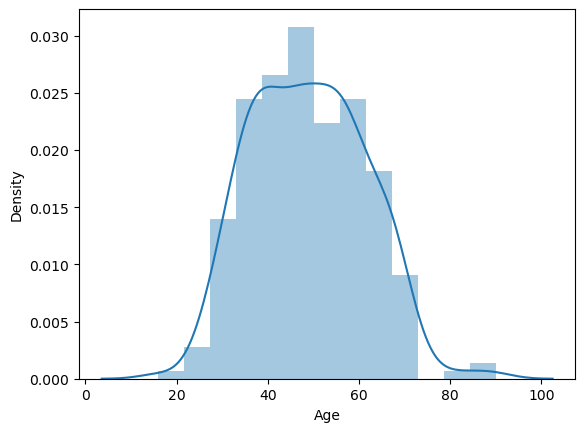

In [11]:
sns.distplot(df['Age'])

Age column has values normally distributed. Dataset contains maximum patients in 40 to 50 age group.

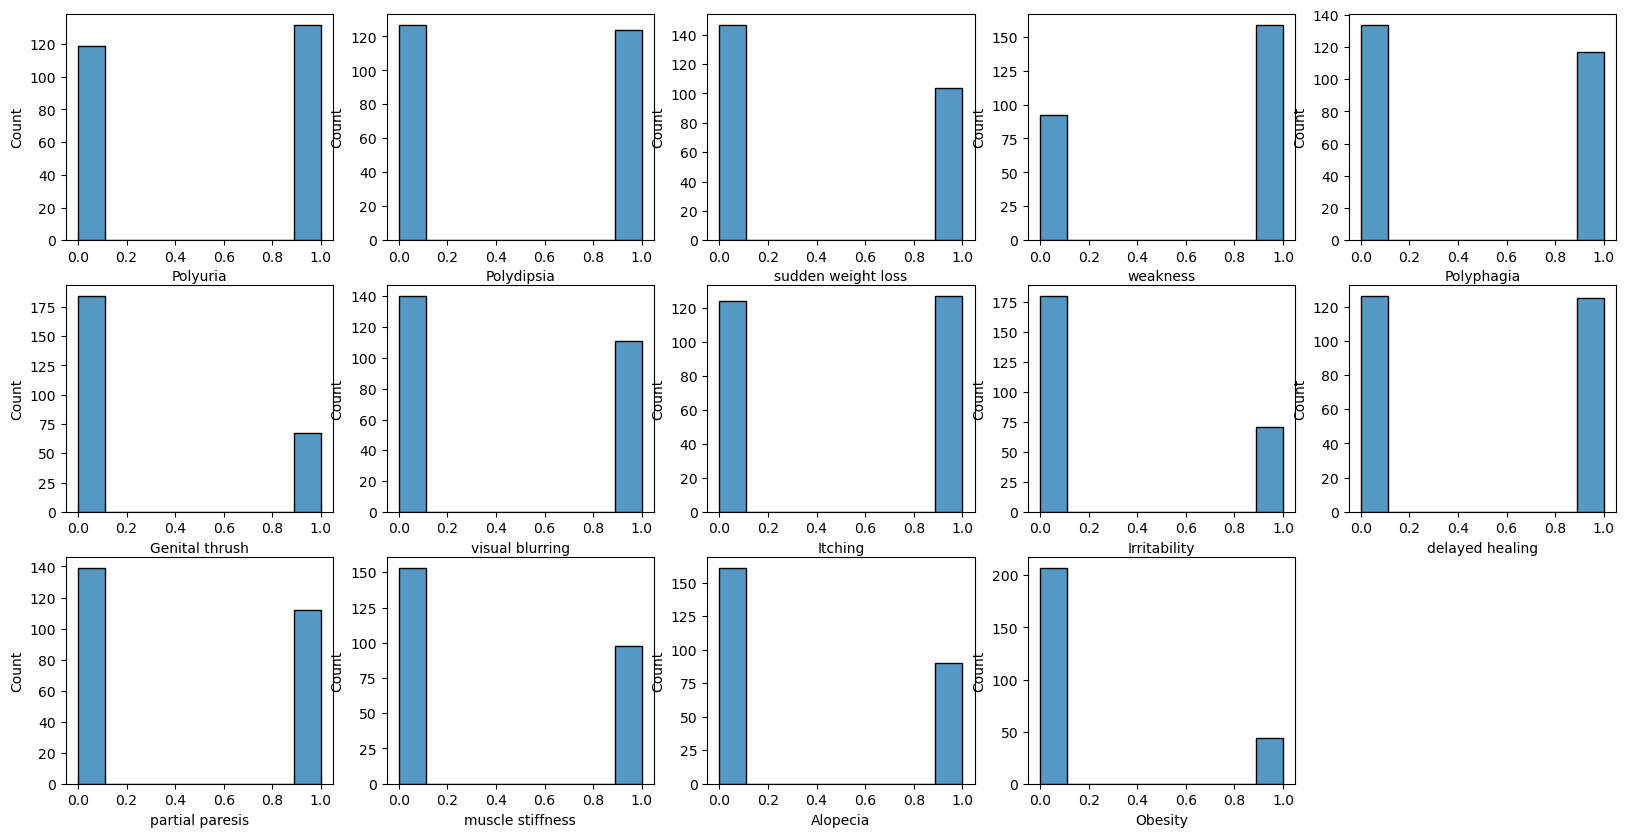

In [12]:
col_list=['Polyuria', 'Polydipsia', 'sudden weight loss','weakness', 'Polyphagia', 'Genital thrush','visual blurring','Itching',
          'Irritability', 'delayed healing', 'partial paresis','muscle stiffness', 'Alopecia','Obesity']

plt.figure(figsize=(20,10))

for i in range(14):
    plt.subplot(3,5,i+1)
    sns.histplot(df[col_list[i]])
    
plt.show()

Above histograms show occurrence of various signs and symptoms in the patients. It seems that there are less patients who are obese. Of the total patients, 50% have polydipsia, itching and delayed healing.

<AxesSubplot:xlabel='class', ylabel='count'>

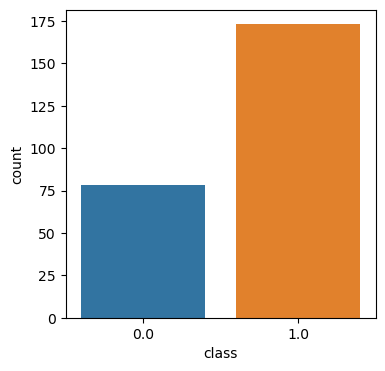

In [13]:
plt.figure(figsize=(4,4))

sns.countplot(df['class'])

There are more patients who have tested positive for the disease.

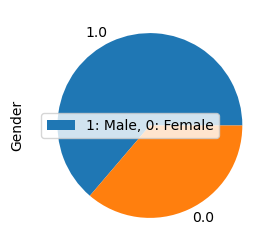

In [14]:
plt.figure(figsize=(3,3))
df['Gender'].value_counts().plot(kind='pie')
plt.legend(['1: Male, 0: Female'], loc = 'center left')

There are more male patients than female.

<AxesSubplot:>

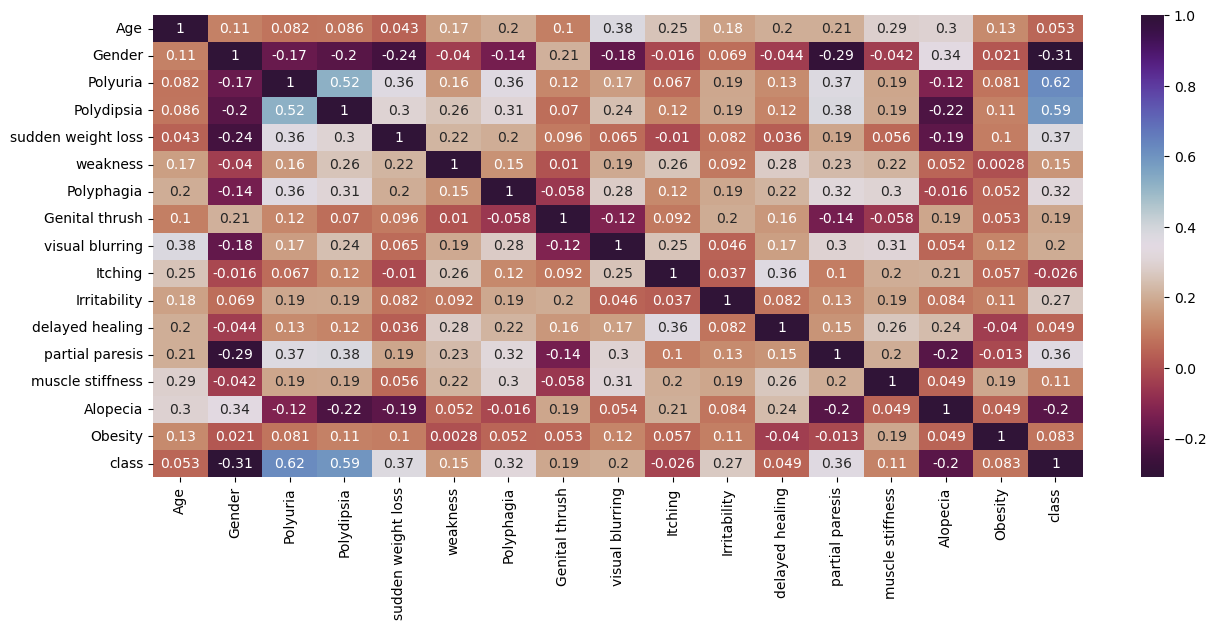

In [15]:
plt.figure(figsize=(15,6))

sns.heatmap(df.corr(), annot=True, cmap='twilight_shifted_r')

The output variable 'class' is strongly related to polyuria and polydipsia.

## Building Model: Support Vector Classifier (SVC)

In [16]:
# Define dependent and independent variable
x = df.iloc[:,:-1]
y = df['class']

In [17]:
# Feature scaling using mimmaxscaler
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(x)

In [18]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.35, random_state=21)

In [19]:
# Hyperparameter optimization using GridSearchCV

from sklearn.svm import SVC
classifier = SVC() #estimator

parameters = [{"C":[1,10,100,1000],
              "kernel":["sigmoid", "rbf","poly"],
              "gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}] #parameters

from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = "accuracy", cv = 10, n_jobs = -1, verbose = 1) 
                  
gd.fit(xtrain, ytrain) #fitting data                    

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['sigmoid', 'rbf', 'poly']}],
             scoring='accuracy', verbose=1)

In [20]:
print('Best parameters are: ', gd.best_params_)
print('Score of the model is: ', gd.best_score_)

Best parameters are:  {'C': 10, 'gamma': 0.4, 'kernel': 'rbf'}
Score of the model is:  0.9268382352941178


In [21]:
# Building SVC model usig best parameters 
classifier_best = SVC(C= 10, gamma= 0.4, kernel= 'rbf')
# Fitting data
classifier_best.fit(xtrain,ytrain)

SVC(C=10, gamma=0.4)

In [22]:
# Prediction
ypred = classifier_best.predict(xtest)

In [23]:
# Evaluating model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy of the model is: ', round(accuracy_score(ytest,ypred)*100,2), 'percent.')
print('--------------------------------------------')
print('Confusion matrix: \n', confusion_matrix(ytest, ypred))
print('--------------------------------------------')
print('Classification report: \n', classification_report(ytest, ypred))

Accuracy of the model is:  92.05 percent.
--------------------------------------------
Confusion matrix: 
 [[27  4]
 [ 3 54]]
--------------------------------------------
Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      0.87      0.89        31
         1.0       0.93      0.95      0.94        57

    accuracy                           0.92        88
   macro avg       0.92      0.91      0.91        88
weighted avg       0.92      0.92      0.92        88



#### Our model has 92% accuracy!